# Milestone 2 - Matthew Currie
## Analyzing Health and Costs using the Medical_Cost dataset provided by UCI

In [3]:
# Relative Importing of Data
import sys
sys.path.append("../scripts")
from project_functions import load_data
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH = "../../data/raw/Medical_Cost.csv"

### Analyzing the Health and Medical Costs of Men with children v. Men without children

We want to create two data frames for comparison: `with_children` and `without_children`. But first, let's set some parameters for the men we want to compare as to narrow down potential variables.

 - Everyone should be in the age range of 25 to 50 (inclusive).
   - This is to limit how much of a factor age is in our comparison
 - Everyone should not be a smoker
   - This is to prevent any smoking related health differences from efffecting our comparison
   
Since the fields `sex` and `smoker` are going to be the same for everyone, we can drop these two fields from our DataFrame.

In [4]:
params = {
    'is_male' : True,
    'older_than' : 24,
    'younger_than' : 51,
    'no_smokers' : True,
    'reset_index' : True,
    'drop' : ['sex', 'smoker']
}

with_children = load_data(
    DATA_PATH,
    has_children=True,
    **params
)

no_children = load_data(
    DATA_PATH,
    has_children=False,
    **params
)

print("Sample of Men with Children")
print(with_children.index)
print('--------------------------------------------------')
print("Sample of Men without Children")
print(no_children.sample(5))

Sample of Men with Children
201
--------------------------------------------------
Sample of Men without Children
    age     bmi  children     region     charges
3    25  26.220         0  northeast  2721.32080
6    26  35.420         0  southeast  2322.62180
66   50  32.205         0  northwest  8835.26495
64   50  36.200         0  southwest  8457.81800
17   28  35.435         0  northeast  3268.84665


### Analyzing the distribution of the data

Let's plot the count of the ages on a graph to make sure their distributions are close enough to validly compare.

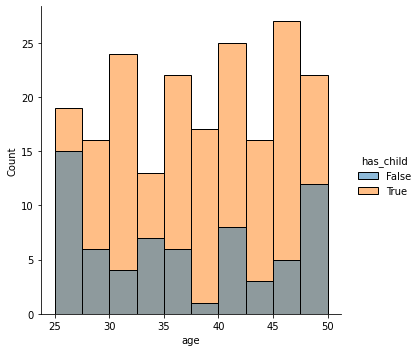

In [5]:
data = with_children[['age', 'children']].append(no_children[['age', 'children']])
data['has_child'] = data['children'] > 0

ax = sns.displot(data, x='age', hue='has_child')

### O no! It seems like there is not enough data about men without children to come to any firm conclusions.

Looks like we will have to free up our memory and start ananlyzing something else.
<!-- I spent so long on this plot it really makes me kind of sad that I don't have the data to do this analysis -->

In [6]:
# Free up memory to help with Python's performance
import gc

del with_children
del no_children
del data
gc.collect()

124

## Lets get a high level look at our data and what trends may be immediately apparent

First, lets get a plain copy of our dataset to look through

In [7]:
df = load_data(
    DATA_PATH
)

Now lets use a _pair plot_ to plot each variable against each other. Chances are that we will learn some quirks about our data.

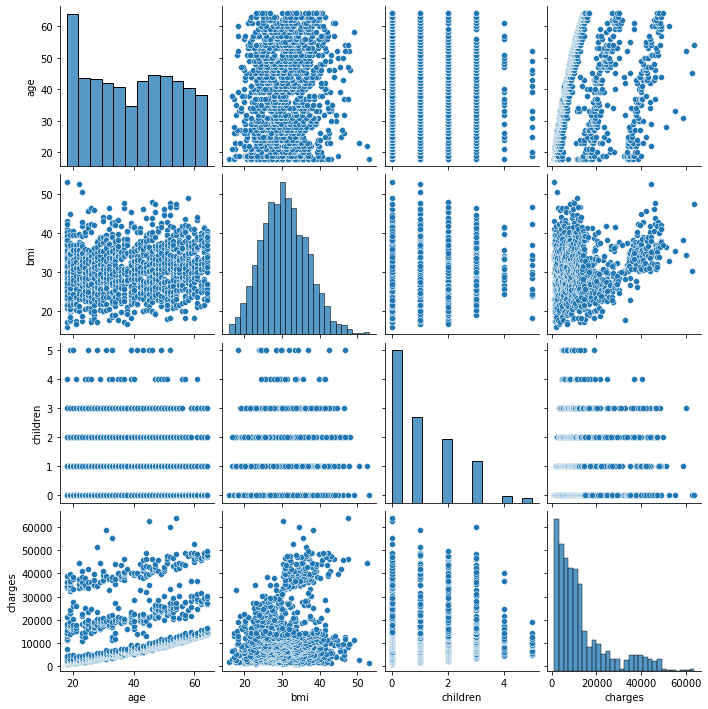

In [8]:
sns.pairplot(df)

Looks a little overwhelming doesn't it? That's okay, we can break it down graph by graph.

On the diagnal is the distribution of each part of the data. 

--------------

__Age__: The age spread seems to be spread evenly among age groups, just with a notably higher amount of youth than other.

__BMI__: The BMI is normally distributed as we would expect.

__Children__: Looking at the graph alone, we could reasonably guess that there is slightly more rows of people with children than without children in the thread.

__Charges__: The distribution of charges makes sense from what we know about health care in the US. Jokes aside, the graph shows that the count of costs decreases as the cost rises. This makes sense intuitively.

--------------

__Other Notes__

* The Chart of BMI to cost seems to reveal a cluster of data points that have both a high cost and high BMI.

* As the Age-Charge graph shows that there seems to be a linear increase in the lowest charges for each age group.

* The Child-Charge doesn't show as much as one might have guessed, this should be looked more into it.

* There may be a trend in that a higher amount of children is correlated with a higher average BMI.

* The Density of points makes it hard to decipher if there are any correlations with age and BMI.

In [9]:
smokers = load_data(
    DATA_PATH,
    only_smokers=True
)

non_smokers = load_data(
    DATA_PATH,
    no_smokers=True
)
# check that there is enough rows to compare
print(smokers.info())
print('-------')
print(non_smokers.info())

# Remove DataFrames that I will not be using
del smokers
del non_smokers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274 entries, 250 to 1241
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       274 non-null    int64  
 1   sex       274 non-null    object 
 2   bmi       274 non-null    float64
 3   children  274 non-null    int64  
 4   smoker    274 non-null    object 
 5   region    274 non-null    object 
 6   charges   274 non-null    float64
dtypes: float64(2), int64(2), object(3)
memory usage: 13.9+ KB
None
-------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1064 entries, 940 to 62
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1064 non-null   int64  
 1   sex       1064 non-null   object 
 2   bmi       1064 non-null   float64
 3   children  1064 non-null   int64  
 4   smoker    1064 non-null   object 
 5   region    1064 non-null   object 
 6   charges   1064 non-null   float64
dtypes: f

Looks like there is enough data to make a meaningful comparison

Let's create a function to create 3 bins for our ages: Young \[18,40); Middle Aged \[40,60\]; Old (60,beyond)

In [28]:
def age_bin(age):
    if age < 40:
        return "Young"
    elif age <= 60:
        return "Middle Aged"
    else:
        return "Old"

<ipython-input-32-b4f13dde2a04>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['is_smoker'] = data['smoker'].map(smoker)
<ipython-input-32-b4f13dde2a04>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['age_bin'] = data['age'].map(age_bin)


<AxesSubplot:xlabel='age_bin', ylabel='charges'>

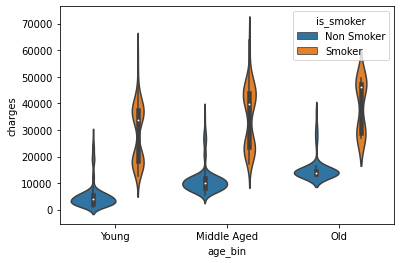

In [32]:
data = df[['age', 'charges', 'smoker']]
smoker = {'yes':'Smoker', 'no':'Non Smoker'} # used for clarity on the graph
data['is_smoker'] = data['smoker'].map(smoker)
data['age_bin'] = data['age'].map(age_bin)


sns.violinplot(data=data, x='age_bin', y='charges', hue='is_smoker')

What the above violin plot shows is that there seems to be a correlation between age and health cost. Furthermore, it also demonstrates that smokers...